In [1]:
# %cd /home/baldeeb/Documents/Projects/ContrastiveLearningOfDenseDescriptor
%cd /home/baldeeb/Documents/Projects/dense_descriptors_and_acf/ContrastiveLearningOfDenseDescriptor

%load_ext autoreload
%autoreload 2

/home/baldeeb/Documents/Projects/dense_descriptors_and_acf/ContrastiveLearningOfDenseDescriptor


In [8]:
#temp config 
class cfg():
    dataset = 'unreal_parts'
    data_dir = '../simple_data'
    image_type = 'RGB'
    obj_class = 'mug'
    n_pair = 0
    n_nonpair_singleobj = 0 
    n_nonpair_bg = 0
    batch_size = 1
    workers = 1

    device = 'cuda:0'
    # device = 'cpu'
device = torch.device(cfg.device)

In [9]:
import torch 
from torchvision.models.segmentation import deeplabv3_resnet50

## Load data
from dataset import make_data_loader
dataloader = make_data_loader(split='train', args=cfg())


[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)



image size torch.Size([1, 480, 640]), target h: 268 w: 278
resized size torch.Size([1, 268, 278])
padded size torch.Size([1, 480, 640])

image size torch.Size([1, 480, 640]), target h: 305 w: 384
resized size torch.Size([1, 305, 384])
padded size torch.Size([1, 480, 640])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


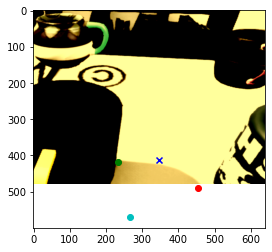

In [15]:
from util.sampling_utils import sample_from_augmented_pair
import matplotlib.pyplot as plt

images = None
positive_samples, negative_samples = None, None
IMAGE_SHAPE = (480, 640)
mask = torch.zeros(IMAGE_SHAPE)
mask[300:400, 300:400] = 1
for im, batch in dataloader:
    images = im.to(device)
    augmentors = [batch[i]['augmentor'] for i in range(2)]
    # positive_samples, negative_samples = sample_from_augmented_pair(IMAGE_SHAPE, augmentors, ROI_mask=mask)
    positive_samples, negative_samples = sample_from_augmented_pair(IMAGE_SHAPE, augmentors,
                                                            num_samples=2000, neg_sample_mean_dist=[100, 150, 175], 
                                                            neg_sample_sigmas=[10, 30, 50])
    break


fig, ax = plt.subplots()
ax.imshow(images[0].detach().clone().cpu().permute(1,2,0).numpy())
ax.scatter(positive_samples[0][0], positive_samples[1][0], color='b', marker='x')

for n, c in zip(negative_samples, ['g', 'r', 'c']): 
    ax.scatter(n[0][0], n[1][0], color=c)



# Sample from differently sized images

## Work in progress

setting up code to scale the Gaussian distributions used above.

In [ ]:
from util.sampling_utils import 
device = torch.device(cfg.device)

dataloader = make_data_loader(split='train', args=cfg())

loss_accumulated = []
IMAGE_SHAPE = (480, 640)

for epoch in range(50):
    for sample_index, (images, metas) in enumerate(tqdm(dataloader)):
        pass
    pass



# Testing of loss function 

In [ ]:
%matplotlib inline
from augmentations.util import union_of_augmented_images_in_original, image_de_normalize
from augmentations.geometrically_invertible_aug import GeometricallyInvertibleAugmentation as Augmentor

from loss.augmentation_loss import overlapping_region_positive_sample_loss

num_augs = 2
augmentors = [Augmentor(im.shape[-2:], img_stats=im_stats) for i in range(num_augs)]
augmented_ims = [aug(im) for aug in augmentors]
de_augmented_ims = [aug.geometric_inverse(x) for aug, x in zip(augmentors, augmented_ims)]

mask = union_of_augmented_images_in_original(augmentors)

indices = (mask.squeeze() == 1).nonzero()
overlapping_region_positive_sample_loss(meta)


In [ ]:
from loss.contrastive_loss import get_match_loss
pseudo_descriptors = [d.squeeze() for d in de_augmented_ims]
get_match_loss(pseudo_descriptors, torch.stack([indices.T, indices.T]))

tensor(3.2651, grad_fn=<DivBackward0>)

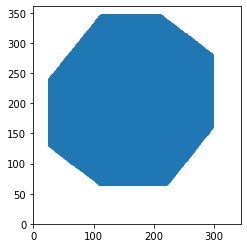

torch.Size([361, 344])

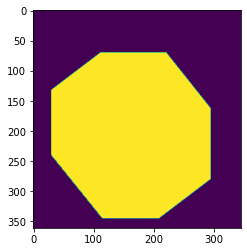

In [ ]:
from matplotlib import pyplot as pyplot

fig, ax = plt.subplots()
ax.scatter(indices[:, 1], indices[:, 0])
ax.set_xlim(0,344)
ax.set_ylim(0,361)
ax.set_aspect('equal')
plt.show()

plt.figure()
plt.imshow(tensor_to_image(mask.unsqueeze(0).unsqueeze(0)))
mask.shape